In [1]:
import pandas as pd
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
import warnings
warnings.filterwarnings('ignore')

In [2]:
def categorizar(df):
    
    df['classe_bonus_bin'] = df['classe_bonus'].apply(lambda x: '00'  if x == 0 else 'Demais')   
    
    df['MD_sexo_bin'] = df['MD_sexo'].map({'Masculino': 'Masculino', 
                                 'Feminino': 'Feminino', 
                                  'ERRO': 'Masculino'}).astype(object)
    
    df['MD_sexo_2bin'] = df['MD_sexo'].map({'Masculino': 1, 
                                 'Feminino': 0, 
                                  'ERRO': 1}).astype(object)


    df['fx_ir_12m_bin'] = df['fx_ir_12m'].apply(lambda x: '01_00_20' if x == '01 - 00-<=020' else
                                                          '02_20_40' if x == '02 - 20-<=040' else
                                                          '03_40_60' if x == '03 - 40-<=060' else
                                                          '04_60_80' if x == '04 - 60-<=080' else
                                                          '05_80_100' if x == '05 - 80-<=100' else
                                                          '02_20_40' if x == 'NI'           else 'ERROR')

  
    df['MD_comb_bin'] = df['MD_comb'].apply(lambda x: 'Gasolina' if x == 'Gasolina'  else 'Demais')

    df['canal_bin'] =  df['canal'].apply(lambda x: 'Corretor_Mais' if x == 'Corretor Mais' else 
                                                   'Corretor_Mais' if x == 'CorretorMais'
                                                                   else    'Demais')
   
    df['per_com_bin'] = df['per_com'].apply(lambda x: 'p_1_10' if x < 10 else
                                                      'p_10_35' if x >= 10 else 'ERROR')    



    df['idade_ult_RNS_bin'] = df['idade_ult_RNS'].apply(lambda x:     'Sem_Sinistro' if x == 'Sem Sinistro' else
                                                                      '01_05_anos' if x == '01 ano' else
                                                                      '01_05_anos' if x == '02 anos' else
                                                                      '01_05_anos' if x == '03 anos' else
                                                                      '01_05_anos' if x == '04 anos' else
                                                                      '01_05_anos' if x == '05 anos' else '06_inf')


    df['UF_bin'] = df['UF'].apply(lambda x:     'AL_CE_RS'  if x == 'AL' else
                                                'AL_CE_RS'  if x == 'CE' else
                                                'AL_CE_RS'  if x == 'RS' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'AP' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'DF' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'ES' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'PA' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'PB' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'RN' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'SC' else 
                                                'GO_MA_MG'             if x == 'GO' else 
                                                'GO_MA_MG'             if x == 'MA' else 
                                                'GO_MA_MG'             if x == 'MG' else 
                                                'MT_PR'                if x == 'MT' else
                                                'MT_PR'                if x == 'PR' else 
                                                'RJ'                   if x == 'RJ' else  
                                                'Demais')

    df['md_tipo_renov_ant_bin'] = df['Renovacao_ant'].apply(lambda x:     '1_SeguroNovo'       if x == '1 - Seguro Novo'  else
                                                                          '2_RenovPropria'     if x == '2 - Renov MAPFRE sem sinistro'   else
                                                                          '2_RenovPropria'     if x == '3 - Renov MAPFRE com sinistro'   else
                                                                          '3_RenovCongenere'   if x == '4 - Renov Congenere sem sinistro' else
                                                                          '3_RenovCongenere'   if x == '5 - Renov Congenere com sinistro' else
                                                                          '3_RenovCongenere'   if x == '6 - Renov BB sem sinistro' else
                                                                          '3_RenovCongenere'   if x == '7 - Renov BB com sinistro' else  
                                                                          '2_RenovPropria')
  
    df['MD_tipo_renov_bin'] = df['MD_tipo_renov'].apply(lambda x:          '2_RenovPropria_sem_sin'     if x == '2 - Renov MAPFRE sem sinistro'   else
                                                                           '3_RenovPropria_com_sin'     if x == '3 - Renov MAPFRE com sinistro'   else
                                                                           'Error')
   
     
    df['Cod_End_bin'] = df['Cod_End'].apply(lambda x: '13509'  if x == 13509 else
                                                      '13509'  if x == 50007 else
                                                      '13509'  if x == 50100 else 'Demais')   

    df['MD_capac_bin'] = df['MD_capac'].apply(lambda x: '5'  if x == 5  else 'Demais')  



    df['fator_ajuste_bin'] = df['MD_fator_ajuste'].apply(lambda x: 'f_80_101'    if x < 101 else
                                                                   'f_101_120'   if x >= 101  else 
                                                                   'f_80_101')   
    
    return df

In [3]:
def demand_model(df):
    import pandas as pd
    import numpy as np 
  
    def demanda(P,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26):
        D=np.exp(1.3356 -0.2576 * np.log(P)  + 1.3647 * np.divide(P, X1)-0.8782 * np.log(np.divide(P, X2))-0.795 * np.log(np.divide(P, X3))-1.6731 * np.log((np.divide(P, X4)))  + 0.3797 * np.log(X5 + 1)  + 0.0011 * X6  + 0.1253 * X7  + 0.1334 * X8-0.1382 * X9  + 0.3919 * X10-0.1397 * X11-0.2305 * X12-0.2832 * X13  + 0.0024 * X14-0.1476 * X15  + 0.2817 * X16  + 0.3336 * X17-0.4115 * X18  + 0.0127 * X19-0.73 * X20  + 0.4343 * X21  + 1.1066 * X22  + 1.9561 * X23-0.0742 * X24 -0.84590*X25- 0.7094 * X26)
        return D/(1+D)

   
    return  demanda(df['premio'], df['is_casco_ofer'], df['GBM_mercado'], df['Premio_IC_100'], df['premio_anterior'], df['MD_tempo_casa_2'], df['per_com'], df['per_com_bin_p_1_10'], df['canal_bin_Corretor_Mais'], df['Cod_End_bin_13509'], df['fator_ajuste_bin_f_101_120'], df['classe_bonus_bin_00'], df['UF_bin_AL_CE_RS'], df['UF_bin_AP_DF_ES_PA_PB_RN_SC'], df['UF_bin_GO_MA_MG'], df['UF_bin_MT_PR'], df['UF_bin_RJ'], df['MD_comb_bin_Gasolina'], df['md_tipo_renov_ant_bin_1_SeguroNovo'], df['md_tipo_renov_ant_bin_3_RenovCongenere'], df['fx_ir_12m_bin_01_00_20'], df['fx_ir_12m_bin_03_40_60'], df['fx_ir_12m_bin_04_60_80'], df['fx_ir_12m_bin_05_80_100'], df['MD_tipo_renov_bin_3_RenovPropria_com_sin'], df['idade_ult_RNS_bin_01_05_anos'], df['idade_ult_RNS_bin_06_inf'])

In [4]:
def relatorio(df):
    import pandas as pd
    import numpy as np 
    
    df["tarifa"] = df["premio"]
    df["per_com_pct"] = df['per_com']/100
    df["premio_prob"] = df["Renewal_Demand_basecase"]*df["premio"]
    df["tarifa_prob"] = df["Renewal_Demand_basecase"]*df["tarifa"]
    df["premio_anterior_prob"] = df["Renewal_Demand_basecase"]*df["premio_anterior"]
    df["Act_cost_prob"] = df["Renewal_Demand_basecase"]*df["Act_cost"]                                                                
    df["comissao_valor"] = df["per_com_pct"] *df["premio"]
    df["comissao_valor_prob"] = df["per_com_pct"] *df["premio_prob"]


    tarifa              = np.mean(df["tarifa"])
    tarifa_w            = np.sum(df["tarifa_prob"])/np.sum(df["Renewal_Demand_basecase"])
    apolice_ofertada    = np.round(df.shape[0],0)
    apolice_estimada    = np.round(np.sum(df["Renewal_Demand_basecase"]),0)
    premio_ofertado     = np.mean(df["premio"])
    retencao_estimada   = np.mean(df["Renewal_Demand_basecase"])
    premio_esperado     = np.sum(df["premio_prob"])/np.sum(df["Renewal_Demand_basecase"])
    risco_ofertado      = np.mean(df["Act_cost"])
    risco_esperado      = np.sum(df["Act_cost_prob"])/np.sum(df["Renewal_Demand_basecase"])
    sp_ofertado         = np.sum(df["Act_cost"])/np.sum(df["premio"])
    sp_esperado         = np.sum(df["Act_cost_prob"])/np.sum(df["premio_prob"])
    comis_ofertado      = np.sum(df["comissao_valor"])/np.sum(df["premio"])
    comis_esperado      = np.sum(df["comissao_valor_prob"])/np.sum(df["premio_prob"])
    premio_anterior     = np.mean(df["premio_anterior"])
    premio_anterior_w   = np.sum(df["premio_anterior_prob"])/np.sum(df["Renewal_Demand_basecase"])
    ic_ofertado       =  sp_ofertado  +  comis_ofertado + 0.2749
    ic_esperado       =  sp_esperado  +  comis_esperado + 0.2749
    premio_anterior   = np.mean(df["premio_anterior"])
    premio_anterior_w   = np.sum(df["premio_anterior_prob"])/np.sum(df["Renewal_Demand_basecase"])

    Relative_Core_Premium_Increase_Offered = (premio_ofertado-premio_anterior)/premio_anterior
    Relative_Core_Premium_Increase_Written = (premio_anterior-premio_anterior_w)/premio_anterior_w
    Relative_Core_Optimization_Increase_Offered=(premio_ofertado-tarifa)/tarifa
    Relative_Core_Optimization_Increase_Written=(premio_ofertado-tarifa)/premio_anterior_w
    Core_Premium_Increase_Offered=(premio_ofertado-premio_anterior)
    Core_Premium_Increase_Written=(premio_esperado-premio_anterior_w)


    tabela = pd.DataFrame([apolice_ofertada,apolice_estimada,
                            retencao_estimada,
                            premio_ofertado,premio_esperado,
                            premio_anterior,premio_anterior_w,
                            Relative_Core_Premium_Increase_Offered,
                            Relative_Core_Premium_Increase_Written,
                            Relative_Core_Optimization_Increase_Offered,
                            Relative_Core_Optimization_Increase_Written,
                            Core_Premium_Increase_Offered,
                            Core_Premium_Increase_Written,
                            risco_ofertado,risco_esperado,
                            comis_ofertado, comis_esperado,
                            sp_ofertado,sp_esperado,
                            ic_ofertado,ic_esperado                  
                          ])



    tabela = tabela.rename(columns = {0 : 'Total'})

    tabela.index = ['Apolices Ofertadas:', 
                    'Apolices Renovadas:',
                    '%Retenção:',
                    'Premio Ofertado:',
                    'Premio Renovado:',  
                    'Premio Anterior Ofertado:',
                    'Premio Anterior Renovado:',
                    'Relative_Core_Premium_Increase_Offered:',
                    'Relative_Core_Premium_Increase_Written:',
                    'Relative_Core_Optimization_Increase_Offered',
                    'Relative_Core_Optimization_Increase_Written:',
                    'Core_Premium_Increase_Offered:',
                    'Core_Premium_Increase_Written:',
                    'Risco Ofertado', 
                    'Risco Renovado', 
                    '%Comissão Ofertada:',
                    '%Comissão Renovada:',
                    '%SP Ofertada:', 
                    '%SP Renovada:',
                    '%IC Ofertado:', 
                    '%IC Renovado:'
                    ]
    return tabela

In [5]:
def relatorio_otim(df):
    import pandas as pd
    import numpy as np 
    
    df["tarifa"] = df["premio"]
    #df["retencao_otimizada"] = df["retencao_otimizada"]
    #df["precos_otimizados"] = df["precos_otimizados"]
    
    df["per_com_pct"] = df['per_com']/100
    df["premio_prob"] = df["retencao_otimizada"]*df["precos_otimizados"]
    df["premio_anterior_prob"] = df["retencao_otimizada"]*df["premio_anterior"]
    df["tarifa_prob"] = df["retencao_otimizada"]*df["tarifa"]
    df["Act_cost_prob"] = df["retencao_otimizada"]*df["Act_cost"]                                                                
    df["comissao_valor"] = df["per_com_pct"] *df["precos_otimizados"]
    df["comissao_valor_prob"] = df["per_com_pct"] *df["premio_prob"]


    tarifa              = np.mean(df["tarifa"])
    tarifa_w            = np.sum(df["tarifa_prob"])/np.sum(df["retencao_otimizada"])
    apolice_ofertada    = np.round(df.shape[0],0)
    apolice_estimada    = np.round(np.sum(df["retencao_otimizada"]),0)
    premio_ofertado     = np.mean(df["precos_otimizados"])
    retencao_estimada   = np.mean(df["retencao_otimizada"])
    premio_esperado     = np.sum(df["premio_prob"])/np.sum(df["retencao_otimizada"])
    risco_ofertado      = np.mean(df["Act_cost"])
    risco_esperado      = np.sum(df["Act_cost_prob"])/np.sum(df["retencao_otimizada"])
    sp_ofertado         = np.sum(df["Act_cost"])/np.sum(df["precos_otimizados"])
    sp_esperado         = np.sum(df["Act_cost_prob"])/np.sum(df["premio_prob"])
    comis_ofertado      = np.sum(df["comissao_valor"])/np.sum(df["precos_otimizados"])
    comis_esperado      = np.sum(df["comissao_valor_prob"])/np.sum(df["premio_prob"])
    premio_anterior     = np.mean(df["premio_anterior"])
    premio_anterior_w   = np.sum(df["premio_anterior_prob"])/np.sum(df["retencao_otimizada"])
    ic_ofertado       =  sp_ofertado  +  comis_ofertado + 0.2749
    ic_esperado       =  sp_esperado  +  comis_esperado + 0.2749
    premio_anterior   = np.mean(df["premio_anterior"])
    premio_anterior_w   = np.sum(df["premio_anterior_prob"])/np.sum(df["retencao_otimizada"])

    Relative_Core_Premium_Increase_Offered = (premio_ofertado-premio_anterior)/premio_anterior
    Relative_Core_Premium_Increase_Written = (premio_anterior-premio_anterior_w)/premio_anterior_w
    Relative_Core_Optimization_Increase_Offered=(premio_ofertado-tarifa)/tarifa
    Relative_Core_Optimization_Increase_Written=(premio_ofertado-tarifa)/premio_anterior_w
    Core_Premium_Increase_Offered=(premio_ofertado-premio_anterior)
    Core_Premium_Increase_Written=(premio_esperado-premio_anterior_w)

    
    
    
    tabela = pd.DataFrame([round(apolice_ofertada,0),
                            round(apolice_estimada,0),
                            round(retencao_estimada,3),
                            round(premio_ofertado,2),
                            round(premio_esperado,2),
                            round(premio_anterior,2),
                            round(premio_anterior_w,2),
                            round(Relative_Core_Premium_Increase_Offered,2),
                            round(Relative_Core_Premium_Increase_Written,2),
                            round(Relative_Core_Optimization_Increase_Offered,2),
                            round(Relative_Core_Optimization_Increase_Written,2),
                            round(Core_Premium_Increase_Offered,2),
                            round(Core_Premium_Increase_Written,2),
                            round(risco_ofertado,2),
                            round(risco_esperado,2),
                            round(comis_ofertado,2),
                            round(comis_esperado,2),
                            round(sp_ofertado,2),
                            round(sp_esperado,4),
                            round(ic_ofertado,4),
                            round(ic_esperado,4)      
                            
                            ])


    tabela = tabela.rename(columns = {0 : 'Total'})

    tabela.index = ['Apolices Ofertadas:', 
                    'Apolices Renovadas:',
                    '%Retenção:',
                    'Premio Ofertado:',
                    'Premio Renovado:',  
                    'Premio Anterior Ofertado:',
                    'Premio Anterior Renovado:',
                    'Relative_Core_Premium_Increase_Offered:',
                    'Relative_Core_Premium_Increase_Written:',
                    'Relative_Core_Optimization_Increase_Offered:',
                    'Relative_Core_Optimization_Increase_Written:',
                    'Core_Premium_Increase_Offered:',
                    'Core_Premium_Increase_Written:',
                    'Risco Ofertado', 
                    'Risco Renovado', 
                    '%Comissão Ofertada:',
                    '%Comissão Renovada:',
                    '%SP Ofertada:', 
                    '%SP Renovada:',
                    '%IC Ofertado:', 
                    '%IC Renovado:'
                    ]

    return tabela

In [6]:
def elasticidade(df):
    
    df['tarifa']=df['premio']
    df['numbers'] = df['premio']/df['tarifa']
    if df['numbers'].any()>1 :
        df['X27'] = df['numbers']-1
    else:
         df['X27']=1
    
    
    P=(df['premio'])
    X1=np.array(df['is_casco_ofer'])
    X2=np.array(df['GBM_mercado'])
    X3=np.array(df['Premio_IC_100'])
    X4=np.array(df['premio_anterior'])
    X5=np.array(df['MD_tempo_casa_2'])
    X6=np.array(df['per_com'])
    X7=np.array(df['per_com_bin_p_1_10'])
    X8=np.array(df['canal_bin_Corretor_Mais'])
    X9=np.array(df['Cod_End_bin_13509'])
    X10=np.array(df['fator_ajuste_bin_f_101_120'])
    X11=np.array(df['classe_bonus_bin_00'])
    X12=np.array(df['UF_bin_AL_CE_RS'])
    X13=np.array(df['UF_bin_AP_DF_ES_PA_PB_RN_SC'])
    X14=np.array(df['UF_bin_GO_MA_MG'])
    X15=np.array(df['UF_bin_MT_PR'])
    X16=np.array(df['UF_bin_RJ'])
    X17=np.array(df['MD_comb_bin_Gasolina'])
    X18=np.array(df['md_tipo_renov_ant_bin_1_SeguroNovo'])
    X19=np.array(df['md_tipo_renov_ant_bin_3_RenovCongenere'])
    X20=np.array(df['fx_ir_12m_bin_01_00_20'])
    X21=np.array(df['fx_ir_12m_bin_03_40_60'])
    X22=np.array(df['fx_ir_12m_bin_04_60_80'])
    X23=np.array(df['fx_ir_12m_bin_05_80_100'])
    X24=np.array(df['MD_tipo_renov_bin_3_RenovPropria_com_sin'])
    X25=np.array(df['idade_ult_RNS_bin_01_05_anos'])
    X26=np.array(df['idade_ult_RNS_bin_06_inf'])
    X26=np.array(df['idade_ult_RNS_bin_06_inf'])
    X27=np.array(df['X27'])

    
    
    
    # Definindo as variáveis simbólicas
    P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27 = sp.symbols('P X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 X27')

    # Definindo a função de demanda
    demanda = sp.exp(1.3356- 0.2576 * sp.log(P)+ 1.3647 * (P / X1)- 0.8782 * sp.log(P / X2)- 0.795 * sp.log(P / X3)- 1.6731 * sp.log(P / X4)+ 0.3797 * sp.log(X5 + 1)+ 0.0011 * X6+ 0.1253 * X7+ 0.1334 * X8- 0.1382 * X9+ 0.3919 * X10- 0.1397 * X11- 0.2305 * X12- 0.2832 * X13+ 0.0024 * X14- 0.1476 * X15+ 0.2817 * X16+ 0.3336 * X17- 0.4115 * X18+ 0.0127 * X19- 0.73 * X20+ 0.4343 * X21+ 1.1066 * X22+ 1.9561 * X23- 0.0742 * X24- 0.8459 * X25- 0.7094 * X26)/(1+sp.exp(1.3356- 0.2576 * sp.log(P)+ 1.3647 * (P / X1)- 0.8782 * sp.log(P / X2)- 0.795 * sp.log(P / X3)- 1.6731 * sp.log(P / X4)+ 0.3797 * sp.log(X5 + 1)+ 0.0011 * X6+ 0.1253 * X7+ 0.1334 * X8- 0.1382 * X9+ 0.3919 * X10- 0.1397 * X11- 0.2305 * X12- 0.2832 * X13+ 0.0024 * X14- 0.1476 * X15+ 0.2817 * X16+ 0.3336 * X17- 0.4115 * X18+ 0.0127 * X19- 0.73 * X20+ 0.4343 * X21+ 1.1066 * X22+ 1.9561 * X23- 0.0742 * X24- 0.8459 * X25- 0.7094 * X26 -3*X27))
    
    # Derivada da demanda em relação ao preço
    demanda_derivada_P = sp.diff(demanda, P)

    # Funções lambdify para avaliação numérica
    demanda_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26,X27), demanda, 'numpy')
    demanda_derivada_P_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26,X27), demanda_derivada_P, 'numpy')

    
    # Extraindo os valores das variáveis
    lista_variaveis_na_ordem = ['is_casco_ofer','GBM_mercado','Premio_IC_100','premio_anterior','MD_tempo_casa_2','per_com','per_com_bin_p_1_10','canal_bin_Corretor_Mais','Cod_End_bin_13509','fator_ajuste_bin_f_101_120','classe_bonus_bin_00','UF_bin_AL_CE_RS','UF_bin_AP_DF_ES_PA_PB_RN_SC','UF_bin_GO_MA_MG','UF_bin_MT_PR','UF_bin_RJ','MD_comb_bin_Gasolina','md_tipo_renov_ant_bin_1_SeguroNovo','md_tipo_renov_ant_bin_3_RenovCongenere','fx_ir_12m_bin_01_00_20','fx_ir_12m_bin_03_40_60','fx_ir_12m_bin_04_60_80','fx_ir_12m_bin_05_80_100','MD_tipo_renov_bin_3_RenovPropria_com_sin','idade_ult_RNS_bin_01_05_anos','idade_ult_RNS_bin_06_inf','X27']

    X_vals = np.array(df.loc[:, lista_variaveis_na_ordem])
    P_val = df['premio'].values

    # Calculando os valores de demanda e sua derivada
    D_val = demanda_func(P_val, *X_vals.T)
    dD_dP_val = demanda_derivada_P_func(P_val, *X_vals.T)

    # Calculando a elasticidade-preço da demanda
    elasticidade_preco = (dD_dP_val * P_val) / D_val
    return elasticidade_preco

In [7]:
def elasticidade2(df):
    
    df['tarifa']=df['premio']
    df['numbers'] = df['premio']/df['tarifa']
        
    df['X27'] = np.where(df['numbers'] > 1, df['numbers'] - 1, 1)
    
    P=(df['premio'])
    X1=np.array(df['is_casco_ofer'])
    X2=np.array(df['GBM_mercado'])
    X3=np.array(df['Premio_IC_100'])
    X4=np.array(df['premio_anterior'])
    X5=np.array(df['MD_tempo_casa_2'])
    X6=np.array(df['per_com'])
    X7=np.array(df['per_com_bin_p_1_10'])
    X8=np.array(df['canal_bin_Corretor_Mais'])
    X9=np.array(df['Cod_End_bin_13509'])
    X10=np.array(df['fator_ajuste_bin_f_101_120'])
    X11=np.array(df['classe_bonus_bin_00'])
    X12=np.array(df['UF_bin_AL_CE_RS'])
    X13=np.array(df['UF_bin_AP_DF_ES_PA_PB_RN_SC'])
    X14=np.array(df['UF_bin_GO_MA_MG'])
    X15=np.array(df['UF_bin_MT_PR'])
    X16=np.array(df['UF_bin_RJ'])
    X17=np.array(df['MD_comb_bin_Gasolina'])
    X18=np.array(df['md_tipo_renov_ant_bin_1_SeguroNovo'])
    X19=np.array(df['md_tipo_renov_ant_bin_3_RenovCongenere'])
    X20=np.array(df['fx_ir_12m_bin_01_00_20'])
    X21=np.array(df['fx_ir_12m_bin_03_40_60'])
    X22=np.array(df['fx_ir_12m_bin_04_60_80'])
    X23=np.array(df['fx_ir_12m_bin_05_80_100'])
    X24=np.array(df['MD_tipo_renov_bin_3_RenovPropria_com_sin'])
    X25=np.array(df['idade_ult_RNS_bin_01_05_anos'])
    X26=np.array(df['idade_ult_RNS_bin_06_inf'])
    X26=np.array(df['idade_ult_RNS_bin_06_inf'])
    X27=np.array(df['X27'])

    
    
    
    # Definindo as variáveis simbólicas
    P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27 = sp.symbols('P X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 X27')

    # Definindo a função de demanda
    demanda = sp.exp(1.3356- 0.2576 * sp.log(P)+ 1.3647 * (P / X1)- 0.8782 * sp.log(P / X2)- 0.795 * sp.log(P / X3)- 1.6731 * sp.log(P / X4)+ 0.3797 * sp.log(X5 + 1)+ 0.0011 * X6+ 0.1253 * X7+ 0.1334 * X8- 0.1382 * X9+ 0.3919 * X10- 0.1397 * X11- 0.2305 * X12- 0.2832 * X13+ 0.0024 * X14- 0.1476 * X15+ 0.2817 * X16+ 0.3336 * X17- 0.4115 * X18+ 0.0127 * X19- 0.73 * X20+ 0.4343 * X21+ 1.1066 * X22+ 1.9561 * X23- 0.0742 * X24- 0.8459 * X25- 0.7094 * X26)/(1+sp.exp(1.3356- 0.2576 * sp.log(P)+ 1.3647 * (P / X1)- 0.8782 * sp.log(P / X2)- 0.795 * sp.log(P / X3)- 1.6731 * sp.log(P / X4)+ 0.3797 * sp.log(X5 + 1)+ 0.0011 * X6+ 0.1253 * X7+ 0.1334 * X8- 0.1382 * X9+ 0.3919 * X10- 0.1397 * X11- 0.2305 * X12- 0.2832 * X13+ 0.0024 * X14- 0.1476 * X15+ 0.2817 * X16+ 0.3336 * X17- 0.4115 * X18+ 0.0127 * X19- 0.73 * X20+ 0.4343 * X21+ 1.1066 * X22+ 1.9561 * X23- 0.0742 * X24- 0.8459 * X25- 0.7094 * X26 -3*X27))
    
    # Derivada da demanda em relação ao preço
    demanda_derivada_P = sp.diff(demanda, P)

    # Funções lambdify para avaliação numérica
    demanda_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26,X27), demanda, 'numpy')
    demanda_derivada_P_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26,X27), demanda_derivada_P, 'numpy')

    
    # Extraindo os valores das variáveis
    lista_variaveis_na_ordem = ['is_casco_ofer','GBM_mercado','Premio_IC_100','premio_anterior','MD_tempo_casa_2','per_com','per_com_bin_p_1_10','canal_bin_Corretor_Mais','Cod_End_bin_13509','fator_ajuste_bin_f_101_120','classe_bonus_bin_00','UF_bin_AL_CE_RS','UF_bin_AP_DF_ES_PA_PB_RN_SC','UF_bin_GO_MA_MG','UF_bin_MT_PR','UF_bin_RJ','MD_comb_bin_Gasolina','md_tipo_renov_ant_bin_1_SeguroNovo','md_tipo_renov_ant_bin_3_RenovCongenere','fx_ir_12m_bin_01_00_20','fx_ir_12m_bin_03_40_60','fx_ir_12m_bin_04_60_80','fx_ir_12m_bin_05_80_100','MD_tipo_renov_bin_3_RenovPropria_com_sin','idade_ult_RNS_bin_01_05_anos','idade_ult_RNS_bin_06_inf','X27']

    X_vals = np.array(df.loc[:, lista_variaveis_na_ordem])
    P_val = df['premio'].values

    # Calculando os valores de demanda e sua derivada
    D_val = demanda_func(P_val, *X_vals.T)
    dD_dP_val = demanda_derivada_P_func(P_val, *X_vals.T)

    # Calculando a elasticidade-preço da demanda
    elasticidade_preco = (dD_dP_val * P_val) / D_val
    return elasticidade_preco

## Base para escorar e otimizar

In [10]:
df_lote_102024 = pd.read_csv("C://Flavio/Projeto Otimizacao/Otimizacao/table Otimizacao Atuarial - segmentacao 52.5.csv",
                             dtype={'chave': 'string'},
                     encoding='latin-1',
                     delimiter='|')


df_lote_102024['GBM_mercado']  = df_lote_102024['GBM_mercado']/(1-df_lote_102024['per_com']/100)
df_lote_102024["premio"] = df_lote_102024["Premio_oferecido_com_batente"]
df_lote_102024["tarifa"] = df_lote_102024["premio"]

In [11]:
df_lote_escorar=df_lote_102024.copy()

In [12]:
df_lote_escorar.rename(columns={'Pr_anterior_TI':'premio_anterior', 
                                   'cod_end': 'Cod_End',
                                   'md_capac': 'MD_capac',
                                   'Classe_bonus':'classe_bonus',
                                   'fator_ajuste': 'MD_fator_ajuste'},inplace=True)

In [13]:
df_lote = categorizar(df_lote_escorar)

In [14]:
df_cat = df_lote[['canal_bin', 'Cod_End_bin', 'fator_ajuste_bin', 'per_com_bin', 'classe_bonus_bin', 'UF_bin', 'MD_comb_bin', 'md_tipo_renov_ant_bin', 'fx_ir_12m_bin', 'MD_tipo_renov_bin','idade_ult_RNS_bin']]
df_cat_glm=pd.get_dummies(df_cat)
df_lote=pd.concat([df_lote,df_cat_glm],axis=1)

In [15]:
df_lote['Renewal_Demand_basecase'] = demand_model(df_lote)

In [16]:
df_lote['elasticidade']=elasticidade(df_lote)

In [17]:
np.mean(elasticidade2(df_lote))

-3.216150870569343

In [19]:
resumo_basecase = relatorio(df_lote)
resumo_basecase

,Total
Apolices Ofertadas:,1473.000000
Apolices Renovadas:,756.000000
%Retenção:,0.513468
Premio Ofertado:,3063.388364
Premio Renovado:,2381.388210
Premio Anterior Ofertado:,2893.832077
Premio Anterior Renovado:,2614.777661
Relative_Core_Premium_Increase_Offered:,0.058592
Relative_Core_Premium_Increase_Written:,0.106722
Relative_Core_Optimization_Increase_Offered,0.000000


In [188]:
df_lote_2 = df_lote.copy()

# Calculando var_prem_anter
df_lote_2['var_prem_anter'] = np.round(df_lote_2['premio'] / df_lote_2['premio_anterior'], 2)

# Avaliando a condição e calculando fator
df_lote_2['fator'] = np.where(df_lote_2['var_prem_anter'] < 0.85, 0.85 / df_lote_2['var_prem_anter'], 1)

# Calculando premio2
df_lote_2['premio2'] = df_lote_2['fator'] * df_lote_2['premio']

# Calculando var_prem_anter2
df_lote_2['var_prem_anter2'] = np.round(df_lote_2['premio2'] / df_lote_2['premio_anterior'], 2)

In [189]:
df_lote_2['var_prem_anter'].describe()

count    1473.000000
mean        1.066429
std         0.364119
min         0.540000
25%         0.770000
50%         0.950000
75%         1.280000
max         1.800000
Name: var_prem_anter, dtype: float64

In [190]:
df_lote_2[['premio2','premio','premio_anterior','var_prem_anter','fator']]

,premio2,premio,premio_anterior,var_prem_anter,fator
0,1124.218500,925.827000,1322.61,0.70,1.214286
1,1258.823504,1258.823504,1449.52,0.87,1.000000
2,2203.030267,2203.030267,1796.61,1.23,1.000000
3,2269.532579,1788.925680,2687.18,0.67,1.268657
4,21192.498000,21192.498000,11773.61,1.80,1.000000
...,...,...,...,...,...
1468,2942.128482,2942.128482,2165.62,1.36,1.000000
1469,2931.413322,2931.413322,2809.58,1.04,1.000000
1470,1955.247764,1748.221530,2299.39,0.76,1.118421
1471,1390.103302,1308.332520,1640.42,0.80,1.062500


In [191]:
df_lote_2[['premio2','premio','var_prem_anter']].describe()

,premio2,premio,var_prem_anter
count,1473.000000,1473.000000,1473.000000
mean,3199.498884,3063.388364,1.066429
std,2298.175855,2272.805783,0.364119
min,555.837563,480.198378,0.540000
25%,1771.175267,1671.556022,0.770000
50%,2576.226383,2422.210028,0.950000
75%,3823.545000,3660.583883,1.280000
max,21192.498000,21192.498000,1.800000


In [192]:
df_lote_2['premio']=df_lote_2['premio2']

resumo_basecase = relatorio(df_lote_2)
resumo_basecase

,Total
Apolices Ofertadas:,1473.000000
Apolices Renovadas:,756.000000
%Retenção:,0.513468
Premio Ofertado:,3199.498884
Premio Renovado:,2549.259601
Premio Anterior Ofertado:,2893.832077
Premio Anterior Renovado:,2614.777661
Relative_Core_Premium_Increase_Offered:,0.105627
Relative_Core_Premium_Increase_Written:,0.106722
Relative_Core_Optimization_Increase_Offered,0.000000


## Filtro df para Otimização  

In [17]:
#df_lote_otim=df_mod.copy()
df_lote_otim_atu = df_lote.query('Amostra_2 == "Segmentacao"')
df_lote_otim_atu.shape

(1473, 187)

In [18]:
df_lote_otim = df_lote_otim_atu
df_lote_otim.shape

(1473, 187)

In [23]:
#list(df_lote_otim.columns)

In [22]:
df_lote_otim[['elasticidade','premio','Premium Parameter','Renewal_Demand_basecase','Renewal Demand']].describe()

,elasticidade,premio,Premium Parameter,Renewal_Demand_basecase,Renewal Demand
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,-3.216151,3063.388364,3015.873865,0.513468,0.525077
std,0.388735,2272.805783,2324.551542,0.262797,0.250629
min,-3.563048,480.198378,478.336023,0.013957,0.013809
25%,-3.456063,1671.556022,1606.800666,0.297187,0.329307
50%,-3.349988,2422.210028,2341.581304,0.540545,0.568997
75%,-3.149575,3660.583883,3560.124087,0.721760,0.721909
max,-1.029459,21192.498000,21192.498000,0.980144,0.956131


In [282]:
#import plotly.express as px
#coluna = ['canal_bin', 'Cod_End_bin', 'fator_ajuste_bin', 'per_com_bin','ind_renovacao']
#for coluna in df_lote_otim:
#    grafico = px.histogram(df_lote_otim,x=coluna,color="ind_renovacao")
#    grafico.show()

## Otimização  

In [24]:
import time
from scipy.optimize import NonlinearConstraint

def timeit(price_slsqp):
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = price_slsqp(*args, **kwargs)
        end = time.perf_counter()
        elapsed = (end - start)/60
        print(f'Tempo: {elapsed:.6f} Minutos')
        return result
    return wrapper

@timeit


def price_slsqp(df, target):
    P = df['premio'].values
    X = df[['is_casco_ofer', 'GBM_mercado', 'Premio_IC_100', 'premio_anterior', 'MD_tempo_casa_2', 'per_com',
            'per_com_bin_p_1_10', 'canal_bin_Corretor_Mais', 'Cod_End_bin_13509', 'fator_ajuste_bin_f_101_120',
            'classe_bonus_bin_00', 'UF_bin_AL_CE_RS', 'UF_bin_AP_DF_ES_PA_PB_RN_SC', 'UF_bin_GO_MA_MG',
            'UF_bin_MT_PR', 'UF_bin_RJ', 'MD_comb_bin_Gasolina', 'md_tipo_renov_ant_bin_1_SeguroNovo',
            'md_tipo_renov_ant_bin_3_RenovCongenere', 'fx_ir_12m_bin_01_00_20', 'fx_ir_12m_bin_03_40_60',
            'fx_ir_12m_bin_04_60_80', 'fx_ir_12m_bin_05_80_100', 'MD_tipo_renov_bin_3_RenovPropria_com_sin',
            'idade_ult_RNS_bin_01_05_anos', 'idade_ult_RNS_bin_06_inf']].values


    def calcular_retencao(P):
        log_P = np.log(P)
        D = np.exp(1.3356 - 0.2576 * log_P + 1.3647 * (P / X[:, 0]) - 0.8782 * np.log(P / X[:, 1])
                   - 0.795 * np.log(P / X[:, 2]) - 1.6731 * np.log(P / X[:, 3]) + 0.3797 * np.log(X[:, 4] + 1)
                   + 0.0011 * X[:, 5] + 0.1253 * X[:, 6] + 0.1334 * X[:, 7] - 0.1382 * X[:, 8] + 0.3919 * X[:, 9]
                   - 0.1397 * X[:, 10] - 0.2305 * X[:, 11] - 0.2832 * X[:, 12] + 0.0024 * X[:, 13] - 0.1476 * X[:, 14]
                   + 0.2817 * X[:, 15] + 0.3336 * X[:, 16] - 0.4115 * X[:, 17] + 0.0127 * X[:, 18] - 0.73 * X[:, 19]
                   + 0.4343 * X[:, 20] + 1.1066 * X[:, 21] + 1.9561 * X[:, 22] - 0.0742 * X[:, 23] - 0.8459 * X[:, 24]
                   - 0.7094 * X[:, 25])
        return D / (1 + D)

    def mean_constraint(P):
        retencao_otimizada1 = calcular_retencao(P)
        return retencao_otimizada1.sum() - target * df.shape[0]

    def objetivo(P):
        precos = P 
        df['precos'] = precos
        df['retencao_otimizada1'] = calcular_retencao(precos)

        margem_esperada_otimizada = df['retencao_otimizada1'] * (precos - df['Act_cost'].values)
        margem_esperada_total = margem_esperada_otimizada.sum()

        return -margem_esperada_total

    nome_variaveis = ['LB', 'UB']
    limites = df[nome_variaveis].values

    # Inicialização dos preços
    initial_guess = P

    # Definir restrição como uma tupla (função, limites inferior e superior)
    constraints = {'type': 'eq', 'fun': mean_constraint}

    # Otimização com SLSQP
    resultado = minimize(objetivo, initial_guess, method='SLSQP', bounds=limites, constraints=constraints)

    precos_otimizados = resultado.x
    df['precos_otimizados'] = precos_otimizados
    df['retencao_otimizada'] = calcular_retencao(precos_otimizados)

       
    # validação
    df['batente_otim']=np.round(df['precos_otimizados']/df['premio'],2)
    df['batente_otim_prem_ant']=np.round(df['precos_otimizados']/df['premio_anterior'],2)

    df.drop(['precos','retencao_otimizada1'],axis='columns', inplace=True)
    
    print(resultado.message) 
    print(relatorio_otim(df))

    return df

In [25]:
Lote_102024_v26=price_slsqp(df_lote_otim,0.525)

Iteration limit reached
                                                  Total
Apolices Ofertadas:                           1473.0000
Apolices Renovadas:                            773.0000
%Retenção:                                       0.5250
Premio Ofertado:                              3018.0800
Premio Renovado:                              2412.6500
Premio Anterior Ofertado:                     2893.8300
Premio Anterior Renovado:                     2607.5200
Relative_Core_Premium_Increase_Offered:          0.0400
Relative_Core_Premium_Increase_Written:          0.1100
Relative_Core_Optimization_Increase_Offered:    -0.0100
Relative_Core_Optimization_Increase_Written:    -0.0200
Core_Premium_Increase_Offered:                 124.2500
Core_Premium_Increase_Written:                -194.8700
Risco Ofertado                                1767.8100
Risco Renovado                                1358.2200
%Comissão Ofertada:                              0.1600
%Comissão Renovada:     

In [194]:
Lote_102024_v26=price_slsqp(df_lote_2,0.525)

Iteration limit reached
                                                  Total
Apolices Ofertadas:                           1473.0000
Apolices Renovadas:                            773.0000
%Retenção:                                       0.5250
Premio Ofertado:                              3017.9900
Premio Renovado:                              2412.3500
Premio Anterior Ofertado:                     2893.8300
Premio Anterior Renovado:                     2602.8500
Relative_Core_Premium_Increase_Offered:          0.0400
Relative_Core_Premium_Increase_Written:          0.1100
Relative_Core_Optimization_Increase_Offered:    -0.0600
Relative_Core_Optimization_Increase_Written:    -0.0700
Core_Premium_Increase_Offered:                 124.1600
Core_Premium_Increase_Written:                -190.5100
Risco Ofertado                                1767.8100
Risco Renovado                                1357.7800
%Comissão Ofertada:                              0.1600
%Comissão Renovada:     

In [193]:
Lote_102024_v26=price_slsqp(df_lote_2,0.535)

Iteration limit reached
                                                  Total
Apolices Ofertadas:                           1473.0000
Apolices Renovadas:                            788.0000
%Retenção:                                       0.5350
Premio Ofertado:                              2987.0800
Premio Renovado:                              2379.6300
Premio Anterior Ofertado:                     2893.8300
Premio Anterior Renovado:                     2605.8300
Relative_Core_Premium_Increase_Offered:          0.0300
Relative_Core_Premium_Increase_Written:          0.1100
Relative_Core_Optimization_Increase_Offered:    -0.0700
Relative_Core_Optimization_Increase_Written:    -0.0800
Core_Premium_Increase_Offered:                  93.2500
Core_Premium_Increase_Written:                -226.2100
Risco Ofertado                                1767.8100
Risco Renovado                                1358.6100
%Comissão Ofertada:                              0.1600
%Comissão Renovada:     

## Validação dos Batentes 

In [45]:
Lote_102024_v26['premio_prob_earnix']=Lote_102024_v26['Premium Parameter']*Lote_102024_v26['Renewal Demand']
Lote_102024_v26['Act_cost_prob_earnix']=Lote_102024_v26['Act_cost']*Lote_102024_v26['Renewal Demand']
Lote_102024_v26['comissao_valor_earnix']=Lote_102024_v26['Premium Parameter']*Lote_102024_v26['per_com_pct']
Lote_102024_v26['comissao_valor_prob_earnix']=Lote_102024_v26['comissao_valor_earnix']*Lote_102024_v26['Renewal Demand']

In [46]:
Lote_102024_v26[['premio_prob_earnix','Act_cost_prob_earnix','comissao_valor_earnix','comissao_valor_prob_earnix']].describe()

,premio_prob_earnix,Act_cost_prob_earnix,comissao_valor_earnix,comissao_valor_prob_earnix
count,1473.000000,1473.000000,1473.000000,1473.000000
mean,1218.971366,697.784263,480.600207,192.750070
std,658.135273,342.993025,450.902300,139.356398
min,147.665385,94.443788,11.825640,9.268433
25%,799.874614,478.960667,229.855465,104.790057
50%,1112.568841,658.238332,345.624195,164.761542
75%,1487.237774,840.251693,568.589295,240.712434
max,6145.833722,4191.365568,3942.021600,1316.961562


In [26]:

Lote_102024_v26[['elasticidade','batente_otim_prem_ant','batente_otim','precos_otimizados','Premium Parameter','Renewal_Demand_basecase','retencao_otimizada','Renewal Demand']].describe()

,elasticidade,batente_otim_prem_ant,batente_otim,precos_otimizados,Premium Parameter,Renewal_Demand_basecase,retencao_otimizada,Renewal Demand
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,-3.216151,1.049817,0.993876,3018.081684,3015.873865,0.513468,0.524999,0.525077
std,0.388735,0.338225,0.076621,2237.951304,2324.551542,0.262797,0.238560,0.250629
min,-3.563048,0.510000,0.900000,528.218216,478.336023,0.013957,0.013957,0.013809
25%,-3.456063,0.790000,0.910000,1678.234236,1606.800666,0.297187,0.361327,0.329307
50%,-3.349988,0.950000,0.990000,2371.873000,2341.581304,0.540545,0.580964,0.568997
75%,-3.149575,1.210000,1.090000,3512.376000,3560.124087,0.721760,0.685488,0.721909
max,-1.029459,1.800000,1.100000,21192.498000,21192.498000,0.980144,0.972352,0.956131


In [30]:
 # validação
Lote_102024_v26['var_otim_ofer_py']=np.round(Lote_102024_v26['precos_otimizados']/Lote_102024_v26['premio'],2)
Lote_102024_v26['var_otim_ofer_earnix']=np.round(Lote_102024_v26['Premium Parameter']/Lote_102024_v26['premio'],2)   

In [33]:
#print(Lote_102024_v26['var_otim_ofer_py'].value_counts(ascending=False)),
#print(Lote_102024_v26['var_otim_ofer_earnix'].value_counts(ascending=False))

(array([384., 110.,  99., 116.,  52., 206.,  40.,  32.,  34., 400.]),
 array([0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08, 1.1 ]),
 <BarContainer object of 10 artists>)

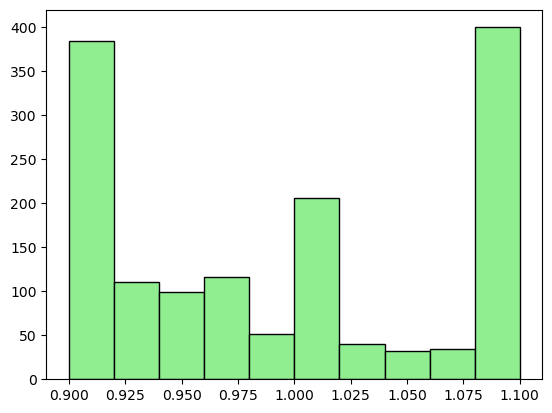

In [42]:
import matplotlib.pyplot as plt
plt.hist(Lote_102024_v26['var_otim_ofer_py'], color='lightgreen', ec='black', bins=10)

(array([377.,  74.,  61.,  53.,  24., 714.,  39.,  36.,  29.,  66.]),
 array([0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08, 1.1 ]),
 <BarContainer object of 10 artists>)

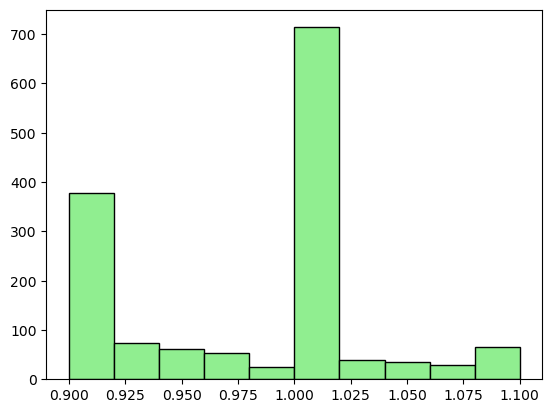

In [43]:
plt.hist(Lote_102024_v26['var_otim_ofer_earnix'], color='lightgreen', ec='black', bins=10)

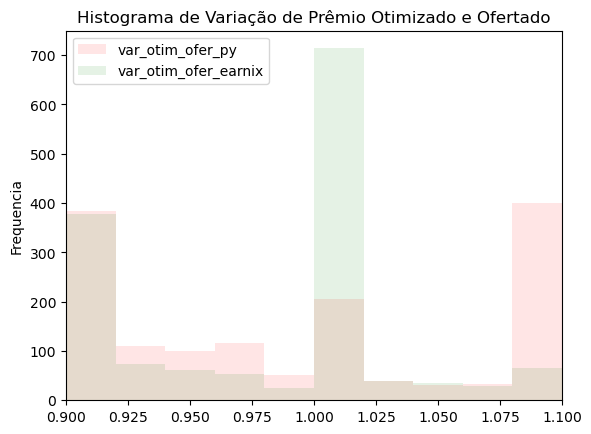

In [41]:
x1 = Lote_102024_v26['var_otim_ofer_py']
x2 = Lote_102024_v26['var_otim_ofer_earnix']

kwargs = dict(alpha=0.1, bins=10)

plt.hist(x1, **kwargs, color='r', label='var_otim_ofer_py')
plt.hist(x2, **kwargs, color='g', label='var_otim_ofer_earnix')
plt.gca().set(title='Histograma de Variação de Prêmio Otimizado e Ofertado', ylabel='Frequencia')
plt.xlim(0.9,1.1)
plt.legend();

In [ ]:
Lote_102024_v26['var_otim_ofer_py']=np.round(Lote_102024_v26['precos_otimizados']/Lote_102024_v26['premio'],2)
Lote_102024_v26['var_otim_ofer_earnix']=np.round(Lote_102024_v26['Premium Parameter']/Lote_102024_v26['premio'],2) 

## Exporting the Data frame.

In [44]:
Lote_102024_v26.to_csv(r'Lote_102024_v26.csv', sep='|' ,header='true',index=False)

In [ ]:
analitico_202410_ajustado=Lote_102024_v1
analitico_202410_ajustado.to_csv(r'analitico_202410_ajustado_elaticidade2.csv', sep='|' ,header='true',index=False)

In [48]:
df_lote_otim2 = df_lote_otim.iloc[0:20,:]
df_lote_otim2.shape

(20, 192)

In [ ]:

def relatorio_otim(df):
    import pandas as pd
    import numpy as np 
    
    df["tarifa"] = df["premio"]
     
    df["per_com_pct"] = df['per_com']/100
    df["premio_prob"] = df["retencao_otimizada"]*df["precos_otimizados"]
    df["premio_anterior_prob"] = df["retencao_otimizada"]*df["premio_anterior"]
    df["tarifa_prob"] = df["retencao_otimizada"]*df["tarifa"]
    df["Act_cost_prob"] = df["retencao_otimizada"]*df["Act_cost"]                                                                
    df["comissao_valor"] = df["per_com_pct"] *df["precos_otimizados"]
    df["comissao_valor_prob"] = df["per_com_pct"] *df["premio_prob"]


    tarifa              = np.mean(df["tarifa"])
    tarifa_w            = np.sum(df["tarifa_prob"])/np.sum(df["retencao_otimizada"])
    apolice_ofertada    = np.round(df.shape[0],0)
    apolice_estimada    = np.round(np.sum(df["retencao_otimizada"]),0)
    premio_ofertado     = np.mean(df["precos_otimizados"])
    retencao_estimada   = np.mean(df["retencao_otimizada"])
    premio_esperado     = np.sum(df["premio_prob"])/np.sum(df["retencao_otimizada"])
    risco_ofertado      = np.mean(df["Act_cost"])
    risco_esperado      = np.sum(df["Act_cost_prob"])/np.sum(df["retencao_otimizada"])
    sp_ofertado         = np.sum(df["Act_cost"])/np.sum(df["precos_otimizados"])
    sp_esperado         = np.sum(df["Act_cost_prob"])/np.sum(df["premio_prob"])
    comis_ofertado      = np.sum(df["comissao_valor"])/np.sum(df["precos_otimizados"])
    comis_esperado      = np.sum(df["comissao_valor_prob"])/np.sum(df["premio_prob"])
    premio_anterior     = np.mean(df["premio_anterior"])
    premio_anterior_w   = np.sum(df["premio_anterior_prob"])/np.sum(df["retencao_otimizada"])
    ic_ofertado       =  sp_ofertado  +  comis_ofertado + 0.2749
    ic_esperado       =  sp_esperado  +  comis_esperado + 0.2749
    premio_anterior   = np.mean(df["premio_anterior"])
    premio_anterior_w   = np.sum(df["premio_anterior_prob"])/np.sum(df["retencao_otimizada"])

 
    
    
    tabela = pd.DataFrame([round(apolice_ofertada,0),
                            round(apolice_estimada,0),
                            round(retencao_estimada,3),
                            round(premio_ofertado,2),
                            round(premio_esperado,2),
                            round(premio_anterior,2),
                            round(premio_anterior_w,2),
                          
                            round(risco_ofertado,2),
                            round(risco_esperado,2),
                            round(comis_ofertado,2),
                            round(comis_esperado,2),
                            round(sp_ofertado,2),
                            round(sp_esperado,4),
                            round(ic_ofertado,4),
                            round(ic_esperado,4)      
                            
                            ])


    tabela = tabela.rename(columns = {0 : 'Total'})

    tabela.index = ['Apolices Ofertadas:', 
                    'Apolices Renovadas:',
                    '%Retenção:',
                    'Premio Ofertado:',
                    'Premio Renovado:',  
                    'Premio Anterior Ofertado:',
                    'Premio Anterior Renovado:',
                   
                    'Risco Ofertado', 
                    'Risco Renovado', 
                    '%Comissão Ofertada:',
                    '%Comissão Renovada:',
                    '%SP Ofertada:', 
                    '%SP Renovada:',
                    '%IC Ofertado:', 
                    '%IC Renovado:'
                    ]

    return tabela

In [ ]:
df['elasticidade_bin'] = pd.cut(x=df['elasticidade'], bins=[-3.6,-3.55,-3.5,-3.45,-3.4,-3.35,-3.3,-3.25,-3.2,-3.15,-3.1,-3.05,-3,-2.95,-2.9,-2.85,-2.8,-2.75,-2.7,-2.65,-2.6,-2.55,-2.5,-2.45,-2.4,-2.35,-2.3,-2.25,-2.2,-2.15,-2.10,0])  
df['elasticidade_abs'] = abs(df['elasticidade'])
df['elasticidade_abs_bin'] = pd.cut(x=df['elasticidade_abs'], bins=[0,2.1,2.15,2.2,2.25,2.3,2.35,2.4,2.45,2.5,2.55,2.6,2.65,2.7,2.75,2.8,2.85,2.9,2.95,3,3.05,3.1,3.15,3.2,3.25,3.3,3.35,3.4,3.45,3.5,3.55,3.6])  

In [108]:
import pandas as pd
import numpy as np

def relatorio_otim2(df, groupby_vars=None):
    if groupby_vars is None:
        groupby_vars = []

    df["tarifa"] = df["premio"]
    df["per_com_pct"] = df['per_com'] / 100

    # Calcular somas e médias ponderadas
    df["premio_prob"] = df["retencao_otimizada"] * df["precos_otimizados"]
    df["premio_anterior_prob"] = df["retencao_otimizada"] * df["premio_anterior"]
    df["tarifa_prob"] = df["retencao_otimizada"] * df["tarifa"]
    df["Act_cost_prob"] = df["retencao_otimizada"] * df["Act_cost"]
    df["comissao_valor_prob"] = df["per_com_pct"] * df["premio_prob"]

    grouped_df = df.groupby(groupby_vars) if groupby_vars else [(None, df)]

    results = []
    for _, group in grouped_df:
        tarifa_w = np.sum(group["tarifa_prob"]) / np.sum(group["retencao_otimizada"])
        apolice_ofertada = np.round(group.shape[0], 0)
        apolice_estimada = np.round(np.sum(group["retencao_otimizada"]), 0)
        premio_ofertado = np.mean(group["precos_otimizados"])
        retencao_estimada = np.mean(group["retencao_otimizada"])
        premio_esperado = np.sum(group["premio_prob"]) / np.sum(group["retencao_otimizada"])
        risco_ofertado = np.mean(group["Act_cost"])
        risco_esperado = np.sum(group["Act_cost_prob"]) / np.sum(group["retencao_otimizada"])
        sp_ofertado = np.sum(group["Act_cost"]) / np.sum(group["precos_otimizados"])
        sp_esperado = np.sum(group["Act_cost_prob"]) / np.sum(group["premio_prob"])
        comis_ofertado = np.sum(group["per_com_pct"] * group["precos_otimizados"]) / np.sum(group["precos_otimizados"])
        comis_esperado = np.sum(group["comissao_valor_prob"]) / np.sum(group["premio_prob"])
        premio_anterior = np.mean(group["premio_anterior"])
        premio_anterior_w = np.sum(group["premio_anterior_prob"]) / np.sum(group["retencao_otimizada"])
        ic_ofertado = sp_ofertado + comis_ofertado + 0.2749
        ic_esperado = sp_esperado + comis_esperado + 0.2749

        results.append([
            round(apolice_ofertada, 0),
            round(apolice_estimada, 0),
            round(retencao_estimada, 3),
            round(premio_ofertado, 2),
            round(premio_esperado, 2),
            round(premio_anterior, 2),
            round(premio_anterior_w, 2),
            round(risco_ofertado, 2),
            round(risco_esperado, 2),
            round(comis_ofertado, 2),
            round(comis_esperado, 2),
            round(sp_ofertado, 2),
            round(sp_esperado, 4),
            round(ic_ofertado, 4),
            round(ic_esperado, 4)
        ])

    tabela = pd.DataFrame(results, columns=[
        'Apolices Ofertadas:',
        'Apolices Renovadas:',
        '%Retenção:',
        'Premio Ofertado:',
        'Premio Renovado:',
        'Premio Anterior Ofertado:',
        'Premio Anterior Renovado:',
        'Risco Ofertado',
        'Risco Renovado',
        '%Comissão Ofertada:',
        '%Comissão Renovada:',
        '%SP Ofertada:',
        '%SP Renovada:',
        '%IC Ofertado:',
        '%IC Renovado:'
    ])

    if groupby_vars:
        tabela[groupby_vars] = [group for group, _ in grouped_df]
        
    tabela = tabela.rename(columns = {0 : 'Total'})    

    return tabela

# Exemplo de uso:
# df é o DataFrame contendo os dados
# groupby_vars é uma lista de colunas para agrupar (por exemplo, ['regiao', 'produto'])
# result_table = relatorio_otim(df, groupby_vars=['regiao', 'produto'])


In [110]:

result_table = relatorio_otim2(df_lote_otim2, groupby_vars=['classe_bonus_bin'])


ValueError: Columns must be same length as key

In [104]:
import pandas as pd
import numpy as np

def relatorio_otim2(df, groupby_vars=None):
    if groupby_vars is None:
        groupby_vars = []

    df["tarifa"] = df["premio"]
    df["per_com_pct"] = df['per_com'] / 100

    # Calcular somas e médias ponderadas
    df["premio_prob"] = df["retencao_otimizada"] * df["precos_otimizados"]
    df["premio_anterior_prob"] = df["retencao_otimizada"] * df["premio_anterior"]
    df["tarifa_prob"] = df["retencao_otimizada"] * df["tarifa"]
    df["Act_cost_prob"] = df["retencao_otimizada"] * df["Act_cost"]
    df["comissao_valor_prob"] = df["per_com_pct"] * df["premio_prob"]

    grouped_df = df.groupby(groupby_vars) if groupby_vars else [(None, df)]

    results = []
    for group_name, group in grouped_df:
        tarifa_w = np.sum(group["tarifa_prob"]) / np.sum(group["retencao_otimizada"])
        apolice_ofertada = np.round(group.shape[0], 0)
        apolice_estimada = np.round(np.sum(group["retencao_otimizada"]), 0)
        premio_ofertado = np.mean(group["precos_otimizados"])
        retencao_estimada = np.mean(group["retencao_otimizada"])
        premio_esperado = np.sum(group["premio_prob"]) / np.sum(group["retencao_otimizada"])
        risco_ofertado = np.mean(group["Act_cost"])
        risco_esperado = np.sum(group["Act_cost_prob"]) / np.sum(group["retencao_otimizada"])
        sp_ofertado = np.sum(group["Act_cost"]) / np.sum(group["precos_otimizados"])
        sp_esperado = np.sum(group["Act_cost_prob"]) / np.sum(group["premio_prob"])
        comis_ofertado = np.sum(group["per_com_pct"] * group["precos_otimizados"]) / np.sum(group["precos_otimizados"])
        comis_esperado = np.sum(group["comissao_valor_prob"]) / np.sum(group["premio_prob"])
        premio_anterior = np.mean(group["premio_anterior"])
        premio_anterior_w = np.sum(group["premio_anterior_prob"]) / np.sum(group["retencao_otimizada"])
        ic_ofertado = sp_ofertado + comis_ofertado + 0.2749
        ic_esperado = sp_esperado + comis_esperado + 0.2749

        result = [
            round(apolice_ofertada, 0),
            round(apolice_estimada, 0),
            round(retencao_estimada, 3),
            round(premio_ofertado, 2),
            round(premio_esperado, 2),
            round(premio_anterior, 2),
            round(premio_anterior_w, 2),
            round(risco_ofertado, 2),
            round(risco_esperado, 2),
            round(comis_ofertado, 2),
            round(comis_esperado, 2),
            round(sp_ofertado, 2),
            round(sp_esperado, 4),
            round(ic_ofertado, 4),
            round(ic_esperado, 4)
        ]

        if groupby_vars:
            result.extend([group_name] if isinstance(group_name, tuple) else [group_name])

        results.append(result)

    columns = [
        'Apolices Ofertadas:',
        'Apolices Renovadas:',
        '%Retenção:',
        'Premio Ofertado:',
        'Premio Renovado:',
        'Premio Anterior Ofertado:',
        'Premio Anterior Renovado:',
        'Risco Ofertado',
        'Risco Renovado',
        '%Comissão Ofertada:',
        '%Comissão Renovada:',
        '%SP Ofertada:',
        '%SP Renovada:',
        '%IC Ofertado:',
        '%IC Renovado:'
    ]

    if groupby_vars:
        columns.extend(groupby_vars)

    tabela = pd.DataFrame(results, columns=columns).T

    return tabela

# Exemplo de uso:
# df é o DataFrame contendo os dados
# groupby_vars é uma lista de colunas para agrupar (por exemplo, ['classe_bonus_bin'])
# result_table = relatorio_otim(df_lote_otim2, groupby_vars=['classe_bonus_bin'])

In [112]:
relatorio_otim2(df_lote_otim2, groupby_vars=['classe_bonus_bin'])

,Apolices Ofertadas:,Apolices Renovadas:,%Retenção:,Premio Ofertado:,Premio Renovado:,Premio Anterior Ofertado:,Premio Anterior Renovado:,Risco Ofertado,Risco Renovado,%Comissão Ofertada:,%Comissão Renovada:,%SP Ofertada:,%SP Renovada:,%IC Ofertado:,%IC Renovado:,classe_bonus_bin
0,1,0.0,0.014,21192.50,21192.50,11773.61,11773.61,16229.77,16229.77,0.10,0.10,0.77,0.7658,1.1407,1.1407,00
1,49,26.0,0.535,2661.44,2231.39,2986.70,2789.53,1636.07,1344.53,0.16,0.17,0.61,0.6026,1.0509,1.0452,Demais


In [255]:
import time
from scipy.optimize import NonlinearConstraint


def timeit(price_slsqp2):
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = price_slsqp2(*args, **kwargs)
        end = time.perf_counter()
        elapsed = (end - start)/60
        print(f'Tempo: {elapsed:.6f} Minutos')
        return result
    return wrapper

@timeit


def price_slsqp2(df, target):
    P = df['premio'].values
    X = df[['is_casco_ofer', 'GBM_mercado', 'Premio_IC_100', 'premio_anterior', 'MD_tempo_casa_2', 'per_com',
            'per_com_bin_p_1_10', 'canal_bin_Corretor_Mais', 'Cod_End_bin_13509', 'fator_ajuste_bin_f_101_120',
            'classe_bonus_bin_00', 'UF_bin_AL_CE_RS', 'UF_bin_AP_DF_ES_PA_PB_RN_SC', 'UF_bin_GO_MA_MG',
            'UF_bin_MT_PR', 'UF_bin_RJ', 'MD_comb_bin_Gasolina', 'md_tipo_renov_ant_bin_1_SeguroNovo',
            'md_tipo_renov_ant_bin_3_RenovCongenere', 'fx_ir_12m_bin_01_00_20', 'fx_ir_12m_bin_03_40_60',
            'fx_ir_12m_bin_04_60_80', 'fx_ir_12m_bin_05_80_100', 'MD_tipo_renov_bin_3_RenovPropria_com_sin',
            'idade_ult_RNS_bin_01_05_anos', 'idade_ult_RNS_bin_06_inf']].values

    def calcular_retencao(P):
        log_P = np.log(P)
        D = np.exp(1.3356 - 0.2576 * log_P + 1.3647 * (P / X[:, 0]) - 0.8782 * np.log(P / X[:, 1])
                   - 0.795 * np.log(P / X[:, 2]) - 1.6731 * np.log(P / X[:, 3]) + 0.3797 * np.log(X[:, 4] + 1)
                   + 0.0011 * X[:, 5] + 0.1253 * X[:, 6] + 0.1334 * X[:, 7] - 0.1382 * X[:, 8] + 0.3919 * X[:, 9]
                   - 0.1397 * X[:, 10] - 0.2305 * X[:, 11] - 0.2832 * X[:, 12] + 0.0024 * X[:, 13] - 0.1476 * X[:, 14]
                   + 0.2817 * X[:, 15] + 0.3336 * X[:, 16] - 0.4115 * X[:, 17] + 0.0127 * X[:, 18] - 0.73 * X[:, 19]
                   + 0.4343 * X[:, 20] + 1.1066 * X[:, 21] + 1.9561 * X[:, 22] - 0.0742 * X[:, 23] - 0.8459 * X[:, 24]
                   - 0.7094 * X[:, 25] )
        return D / (1 + D)

 
    def mean_constraint(P):
        retencao_otimizada1 = calcular_retencao(P)
        return retencao_otimizada1.sum() - target * df.shape[0]

    def lower_bound_constraint(P):
        return P - np.where((df['elasticidade'] >= -3.2) & (df['elasticidade'] <= -2.99), df['premio'], P)

    def upper_bound_constraint(P):
        return np.where((df['elasticidade'] >= -3.2) & (df['elasticidade'] <= -2.99), df['premio'], P) - P


    def objetivo(P):
        df['precos'] = P
        df['retencao_otimizada1'] = calcular_retencao(P)
        margem_esperada_otimizada = df['retencao_otimizada1'] * (P - df['Act_cost'].values)
        margem_esperada_total = margem_esperada_otimizada.sum()
        return -margem_esperada_total

    nome_variaveis = ['LB', 'UB']
    limites = df[nome_variaveis].values

    initial_guess = P

    constraints = [
        {'type': 'eq', 'fun': mean_constraint},
        {'type': 'ineq', 'fun': lower_bound_constraint},
        {'type': 'ineq', 'fun': upper_bound_constraint}
    ]

    resultado = minimize(objetivo, initial_guess, method='SLSQP', bounds=limites, constraints=constraints)

    precos_otimizados = resultado.x
    df['precos_otimizados'] = precos_otimizados
    df['retencao_otimizada'] = calcular_retencao(precos_otimizados)

    df['batente_otim'] = np.round(df['precos_otimizados'] / df['premio'], 2)
    df['batente_otim_prem_ant'] = np.round(df['precos_otimizados'] / df['premio_anterior'], 2)

    df.drop(['precos', 'retencao_otimizada1'], axis='columns', inplace=True)

    print(resultado.message)
    print(relatorio_otim(df))

    return df

# Exemplo de uso:
# df é o DataFrame contendo os dados
# target é o valor alvo para a retenção
# result_df = price_slsqp2(df, target)



In [266]:
df = Lote_102024_v28

In [267]:
def lower_bound_constraint(P):
    
    return np.where((df['elasticidade'] >= -3.2) & (df['elasticidade'] <= -2.99), df['premio'], P)

In [268]:
def upper_bound_constraint(P):
    return np.where((df['elasticidade'] >= -3.2) & (df['elasticidade'] <= -2.99), df['premio'], P) - P

In [289]:
#lower_bound_constraint(df_lote_otim2['precos_otimizados'])

In [ ]:
    nome_variaveis = ['LB', 'UB']
    limites = df[nome_variaveis].values

df['LB_2'] = np.where((df['elasticidade'] >= -3.2) & (df['elasticidade'] <= -2.99), df['elasticidade'], np.nan)
        
    df['X27'] = np.where(df['numbers'] > 1, df['numbers'] - 1, 1)
    

In [ ]:
crie uma restrição lower_bound e up_bound sendo igual  df['premio'] se df['elasticidade'] >= -3.2) & (df['elasticidade'] <= -2.99)
e igual a df['precos'] caso contrario

In [224]:
df_lote_otim2 = df_lote_otim.iloc[0:50,:]
df_lote_otim2.shape


(50, 197)

In [225]:
relatorio(df_lote_otim2)

,Total
Apolices Ofertadas:,50.000000
Apolices Renovadas:,23.000000
%Retenção:,0.464397
Premio Ofertado:,3270.160513
Premio Renovado:,2393.239931
Premio Anterior Ofertado:,3162.434200
Premio Anterior Renovado:,2772.515382
Relative_Core_Premium_Increase_Offered:,0.034064
Relative_Core_Premium_Increase_Written:,0.140637
Relative_Core_Optimization_Increase_Offered,0.000000


In [74]:
Lote_102024_v27=price_slsqp(df_lote_otim2,0.525)

Optimization terminated successfully
                                                  Total
Apolices Ofertadas:                             50.0000
Apolices Renovadas:                             26.0000
%Retenção:                                       0.5250
Premio Ofertado:                              3032.0600
Premio Renovado:                              2241.4700
Premio Anterior Ofertado:                     3162.4300
Premio Anterior Renovado:                     2794.3100
Relative_Core_Premium_Increase_Offered:         -0.0400
Relative_Core_Premium_Increase_Written:          0.1300
Relative_Core_Optimization_Increase_Offered:    -0.0700
Relative_Core_Optimization_Increase_Written:    -0.0900
Core_Premium_Increase_Offered:                -130.3700
Core_Premium_Increase_Written:                -552.8400
Risco Ofertado                                1927.9400
Risco Renovado                                1352.4500
%Comissão Ofertada:                              0.1500
%Comissão R

In [256]:
Lote_102024_v28=price_slsqp2(df_lote_otim2,0.525)

Iteration limit reached
                                                  Total
Apolices Ofertadas:                             50.0000
Apolices Renovadas:                             26.0000
%Retenção:                                       0.5220
Premio Ofertado:                              3042.0100
Premio Renovado:                              2257.2300
Premio Anterior Ofertado:                     3162.4300
Premio Anterior Renovado:                     2793.8900
Relative_Core_Premium_Increase_Offered:         -0.0400
Relative_Core_Premium_Increase_Written:          0.1300
Relative_Core_Optimization_Increase_Offered:    -0.0700
Relative_Core_Optimization_Increase_Written:    -0.0800
Core_Premium_Increase_Offered:                -120.4200
Core_Premium_Increase_Written:                -536.6600
Risco Ofertado                                1927.9400
Risco Renovado                                1352.9400
%Comissão Ofertada:                              0.1500
%Comissão Renovada:     

In [257]:
Lote_102024_v29=price_slsqp2(df_lote_otim,0.525)

Iteration limit reached
                                                  Total
Apolices Ofertadas:                           1473.0000
Apolices Renovadas:                            773.0000
%Retenção:                                       0.5250
Premio Ofertado:                              3015.7300
Premio Renovado:                              2403.0400
Premio Anterior Ofertado:                     2893.8300
Premio Anterior Renovado:                     2607.6800
Relative_Core_Premium_Increase_Offered:          0.0400
Relative_Core_Premium_Increase_Written:          0.1100
Relative_Core_Optimization_Increase_Offered:    -0.0200
Relative_Core_Optimization_Increase_Written:    -0.0200
Core_Premium_Increase_Offered:                 121.9000
Core_Premium_Increase_Written:                -204.6400
Risco Ofertado                                1767.8100
Risco Renovado                                1356.1300
%Comissão Ofertada:                              0.1600
%Comissão Renovada:     

In [290]:
 # validação
Lote_102024_v29['var_otim_ofer_py']=np.round(Lote_102024_v29['precos_otimizados']/Lote_102024_v29['premio'],2)
Lote_102024_v29['var_otim_ofer_earnix']=np.round(Lote_102024_v29['Premium Parameter']/Lote_102024_v29['premio'],2)   

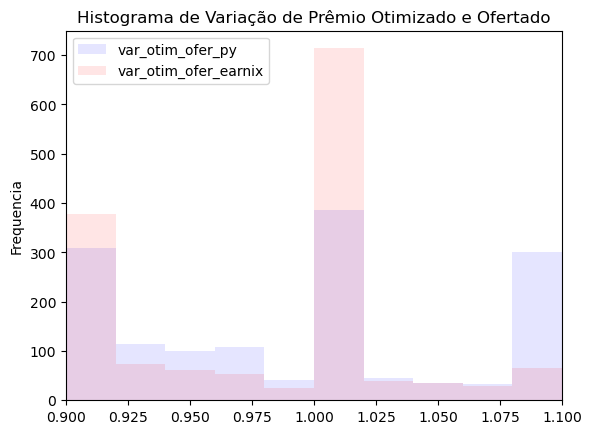

In [293]:
x1 = Lote_102024_v29['var_otim_ofer_py']
x2 = Lote_102024_v29['var_otim_ofer_earnix']

kwargs = dict(alpha=0.1, bins=10)

plt.hist(x1, **kwargs, color='b', label='var_otim_ofer_py')
plt.hist(x2, **kwargs, color='red', label='var_otim_ofer_earnix')
plt.gca().set(title='Histograma de Variação de Prêmio Otimizado e Ofertado', ylabel='Frequencia')
plt.xlim(0.9,1.1)
plt.legend();

In [294]:
Lote_102024_v29.to_csv(r'Lote_102024_v29.csv', sep='|' ,header='true',index=False)

In [287]:
Lote_102024_v30=price_slsqp2(df_lote_otim2,0.47)

Iteration limit reached
                                                  Total
Apolices Ofertadas:                             50.0000
Apolices Renovadas:                             24.0000
%Retenção:                                       0.4700
Premio Ofertado:                              3203.7800
Premio Renovado:                              2435.9300
Premio Anterior Ofertado:                     3162.4300
Premio Anterior Renovado:                     2791.6900
Relative_Core_Premium_Increase_Offered:          0.0100
Relative_Core_Premium_Increase_Written:          0.1300
Relative_Core_Optimization_Increase_Offered:    -0.0200
Relative_Core_Optimization_Increase_Written:    -0.0200
Core_Premium_Increase_Offered:                  41.3500
Core_Premium_Increase_Written:                -355.7600
Risco Ofertado                                1927.9400
Risco Renovado                                1354.6700
%Comissão Ofertada:                              0.1500
%Comissão Renovada:     

In [246]:
#elast(df_lote_otim2,df_lote_otim2['premio'])

In [288]:
media_ponderada = sum(df_lote_otim2['premio'] * df_lote_otim2['retencao_otimizada'] for nota, peso in zip(df_lote_otim2['premio'], df_lote_otim2['retencao_otimizada'])) / sum(df_lote_otim2['retencao_otimizada'])

In [146]:
precos_otimizados = Lote_102024_v27['precos_otimizados']
retencao_otimizada =Lote_102024_v27['retencao_otimizada']
Act_cost =Lote_102024_v27['Act_cost']

premio_esperado = sum(precos_otimizados * retencao_otimizada for precos_otimizados, retencao_otimizada in zip(precos_otimizados, retencao_otimizada)) / sum(retencao_otimizada)
print(premio_esperado)

2241.4672244591


In [283]:
from scipy.optimize import minimize
import numpy as np

def timeit(price_slsqp3):
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = price_slsqp3(*args, **kwargs)
        end = time.perf_counter()
        elapsed = (end - start)/60
        print(f'Tempo: {elapsed:.6f} Minutos')
        return result
    return wrapper

@timeit


def price_slsqp3(df, target):
    P = df['premio'].values
    X = df[['is_casco_ofer', 'GBM_mercado', 'Premio_IC_100', 'premio_anterior', 'MD_tempo_casa_2', 'per_com',
            'per_com_bin_p_1_10', 'canal_bin_Corretor_Mais', 'Cod_End_bin_13509', 'fator_ajuste_bin_f_101_120',
            'classe_bonus_bin_00', 'UF_bin_AL_CE_RS', 'UF_bin_AP_DF_ES_PA_PB_RN_SC', 'UF_bin_GO_MA_MG',
            'UF_bin_MT_PR', 'UF_bin_RJ', 'MD_comb_bin_Gasolina', 'md_tipo_renov_ant_bin_1_SeguroNovo',
            'md_tipo_renov_ant_bin_3_RenovCongenere', 'fx_ir_12m_bin_01_00_20', 'fx_ir_12m_bin_03_40_60',
            'fx_ir_12m_bin_04_60_80', 'fx_ir_12m_bin_05_80_100', 'MD_tipo_renov_bin_3_RenovPropria_com_sin',
            'idade_ult_RNS_bin_01_05_anos', 'idade_ult_RNS_bin_06_inf']].values

    # Função para calcular a retenção
    def calcular_retencao(P):
        log_P = np.log(P)
        D = np.exp(1.3356 - 0.2576 * log_P + 1.3647 * (P / X[:, 0]) - 0.8782 * np.log(P / X[:, 1])
                   - 0.795 * np.log(P / X[:, 2]) - 1.6731 * np.log(P / X[:, 3]) + 0.3797 * np.log(X[:, 4] + 1)
                   + 0.0011 * X[:, 5] + 0.1253 * X[:, 6] + 0.1334 * X[:, 7] - 0.1382 * X[:, 8] + 0.3919 * X[:, 9]
                   - 0.1397 * X[:, 10] - 0.2305 * X[:, 11] - 0.2832 * X[:, 12] + 0.0024 * X[:, 13] - 0.1476 * X[:, 14]
                   + 0.2817 * X[:, 15] + 0.3336 * X[:, 16] - 0.4115 * X[:, 17] + 0.0127 * X[:, 18] - 0.73 * X[:, 19]
                   + 0.4343 * X[:, 20] + 1.1066 * X[:, 21] + 1.9561 * X[:, 22] - 0.0742 * X[:, 23] - 0.8459 * X[:, 24]
                   - 0.7094 * X[:, 25])
        return D / (1 + D)

    # Restrição de retenção média
    def mean_constraint(P):
        retencao_otimizada1 = calcular_retencao(P)
        return retencao_otimizada1.sum() - target * df.shape[0]

    # Restrição para manter o preço igual ao preço inicial quando a elasticidade estiver no intervalo especificado
    def elasticidade_constraint(P):
        elasticidade = df['elasticidade'].values
        P_inicial = df['premio'].values
        # Se a elasticidade estiver no intervalo, a diferença entre P e P_inicial deve ser zero
        return np.where((elasticidade >= -3) & (elasticidade <= -2.9), P_inicial, P) - P

    # Função objetivo (maximização da margem esperada)
    def objetivo(P):
        df['precos'] = P
        df['retencao_otimizada1'] = calcular_retencao(P)
        margem_esperada_otimizada = df['retencao_otimizada1'] * (P - df['Act_cost'].values)
        margem_esperada_total = margem_esperada_otimizada.sum()
        return -margem_esperada_total

    # Limites (inferior e superior)
    nome_variaveis = ['LB', 'UB']
    limites = df[nome_variaveis].values

    # Chute inicial
    initial_guess = P

    # Definir restrições
    constraints = [
        {'type': 'eq', 'fun': mean_constraint},
        {'type': 'eq', 'fun': elasticidade_constraint}  # Nova restrição de elasticidade
    ]

    # Resolver problema de otimização
    resultado = minimize(objetivo, initial_guess, method='SLSQP', bounds=limites, constraints=constraints)

    # Preços otimizados
    precos_otimizados = resultado.x
    df['precos_otimizados'] = precos_otimizados
    df['retencao_otimizada'] = calcular_retencao(precos_otimizados)

    # Calcular os batentes otimizados
    df['batente_otim'] = np.round(df['precos_otimizados'] / df['premio'], 2)
    df['batente_otim_prem_ant'] = np.round(df['precos_otimizados'] / df['premio_anterior'], 2)

    # Remover colunas temporárias
    df.drop(['precos', 'retencao_otimizada1'], axis='columns', inplace=True)

    # Exibir resultado da otimização
    print(resultado.message)
    print(relatorio_otim(df))

    return df


In [286]:
Lote_102024_v30=price_slsqp3(df_lote_otim2,0.4)

More equality constraints than independent variables
                                                  Total
Apolices Ofertadas:                             50.0000
Apolices Renovadas:                             23.0000
%Retenção:                                       0.4640
Premio Ofertado:                              3270.1600
Premio Renovado:                              2393.2400
Premio Anterior Ofertado:                     3162.4300
Premio Anterior Renovado:                     2772.5200
Relative_Core_Premium_Increase_Offered:          0.0300
Relative_Core_Premium_Increase_Written:          0.1400
Relative_Core_Optimization_Increase_Offered:     0.0000
Relative_Core_Optimization_Increase_Written:     0.0000
Core_Premium_Increase_Offered:                 107.7300
Core_Premium_Increase_Written:                -379.2800
Risco Ofertado                                1927.9400
Risco Renovado                                1328.3500
%Comissão Ofertada:                              0.

In [ ]:
    df["tarifa"] = df["premio"]
    df["per_com_pct"] = df['per_com'] / 100

    # Calcular somas e médias ponderadas
    df["premio_prob"] = df["retencao_otimizada"] * df["precos_otimizados"]
    df["premio_anterior_prob"] = df["retencao_otimizada"] * df["premio_anterior"]
    df["tarifa_prob"] = df["retencao_otimizada"] * df["tarifa"]
    df["Act_cost_prob"] = df["retencao_otimizada"] * df["Act_cost"]
    df["comissao_valor_prob"] = df["per_com_pct"] * df["premio_prob"]
    
precos_otimizados = Lote_102024_v27['precos_otimizados']
retencao_otimizada =Lote_102024_v27['retencao_otimizada']
Act_cost =Lote_102024_v27['Act_cost']

premio_esperado = sum(precos_otimizados * retencao_otimizada for precos_otimizados, retencao_otimizada in zip(precos_otimizados, retencao_otimizada)) / sum(retencao_otimizada)
print(premio_esperado)

In [295]:
df_lote_otim3=df_lote_otim2
df_lote_otim3["tarifa"] = df_lote_otim3["premio"]

In [298]:
corrigir o erro da função abaixo: 
TypeError: can't multiply sequence by non-int of type 'float'


import pandas as pd
import numpy as np

def relatorio(df,var_premio,var_retencao, groupby_vars=None):
    
    premio_otim = var_premio
    retencao_otim = var_retencao
    custo = df['Act_cost']
    premio_tarifa = df['tarifa']
    per_com_pct = df["per_com_pct"] = df['per_com'] / 100
    
    if groupby_vars is None:
        groupby_vars = []

    grouped_df = df.groupby(groupby_vars) if groupby_vars else [(None, df)]

    results = []
    
    for group_name, group in grouped_df:
        tarifa_w =sum(premio_tarifa * retencao_otim for premio_tarifa, retencao_otim in zip(premio_tarifa, retencao_otim)) / sum(retencao_otim)
        apolice_ofertada = np.round(group.shape[0], 0)
        apolice_estimada = np.round(np.sum(group["retencao_otim"]), 0)
        premio_ofertado = np.mean(group["premio_otim"])
        retencao_estimada = np.mean(group["retencao_otim"])
        premio_esperado =sum(premio_otim * retencao_otim for premio_otim, retencao_otim in zip(premio_otim, retencao_otim)) / sum(retencao_otim)
        risco_ofertado = np.mean(group["custo"])
        risco_esperado =sum(custo * retencao_otim for custo, retencao_otim in zip(custo, retencao_otim)) / sum(retencao_otim)
        sp_ofertado = risco_ofertado / premio_ofertado
        sp_esperado = risco_esperado / premio_esperado
        comis_valor_prob =sum(premio_otim * per_com_pct for premio_otim, per_com_pct in zip(premio_otim, per_com_pct)) 
        premio_prob =sum(premio_otim * retencao_otim for premio_otim, retencao_otim in zip(premio_otim, retencao_otim)) 
        comis_ofertado =sum(premio_otim * per_com_pct for premio_otim, per_com_pct in zip(premio_otim, per_com_pct)) / sum(premio_otim)
        comis_esperado = comis_valor_prob / premio_prob
        premio_anterior = np.mean(group["premio_anterior"])
        premio_anterior_w =sum(premio_anterior * retencao_otim for premio_anterior, retencao_otim in zip(premio_anterior, retencao_otim)) / sum(retencao_otim)
 
        ic_ofertado = sp_ofertado + comis_ofertado + 0.2749
        ic_esperado = sp_esperado + comis_esperado + 0.2749

        if groupby_vars:
            result.extend([group_name] if isinstance(group_name, tuple) else [group_name])

        results.append(result)

  
    if groupby_vars:
        columns.extend(groupby_vars)

    tabela = pd.DataFrame(results, columns=columns)

    return tabela

# Exemplo de uso:
# df é o DataFrame contendo os dados
# groupby_vars é uma lista de colunas para agrupar (por exemplo, ['classe_bonus_bin'])
# result_table = relatorio_otim(df_lote_otim2, groupby_vars=['classe_bonus_bin'])

In [302]:
result_table = relatorio(df_lote_otim3,"precos_otimizados","retencao_otimizada" ,groupby_vars=['classe_bonus_bin'])

TypeError: can't multiply sequence by non-int of type 'float'

In [312]:
import pandas as pd
import numpy as np

def relatorio(df, var_premio, var_retencao, groupby_vars=None):
    
    premio_otim = df[var_premio]
    retencao_otim = df[var_retencao]
    custo = df['Act_cost']
    premio_tarifa = df['tarifa']
    per_com_pct = df['per_com'] / 100
    
    if groupby_vars is None:
        groupby_vars = []

    grouped_df = df.groupby(groupby_vars) if groupby_vars else [(None, df)]

    results = []
    
    for group_name, group in grouped_df:
        tarifa_w = sum(premio_tarifa * retencao_otim) / sum(retencao_otim)
        apolice_ofertada = np.round(group.shape[0], 0)
        apolice_estimada = np.round(np.sum(group[var_retencao]), 0)
        premio_ofertado = np.mean(group[var_premio])
        retencao_estimada = np.mean(group[var_retencao])
        premio_esperado = sum(premio_otim * retencao_otim) / sum(retencao_otim)
        risco_ofertado = np.mean(group['Act_cost'])
        risco_esperado = sum(custo * retencao_otim) / sum(retencao_otim)
        sp_ofertado = risco_ofertado / premio_ofertado
        sp_esperado = risco_esperado / premio_esperado
        comis_valor_prob = sum(premio_otim * per_com_pct)
        premio_prob = sum(premio_otim * retencao_otim)
        comis_ofertado = sum(premio_otim * per_com_pct) / sum(premio_otim)
        comis_esperado = comis_valor_prob / premio_prob
        premio_anterior = np.mean(group['premio_anterior'])
        premio_anterior_w = sum(premio_anterior * retencao_otim) / sum(retencao_otim)
 
        ic_ofertado = sp_ofertado + comis_ofertado + 0.2749
        ic_esperado = sp_esperado + comis_esperado + 0.2749

        result = [
            apolice_ofertada, apolice_estimada, premio_ofertado, retencao_estimada,
            premio_esperado, risco_ofertado, risco_esperado, sp_ofertado, sp_esperado,
            comis_valor_prob, premio_prob, comis_ofertado, comis_esperado, premio_anterior,
            premio_anterior_w, ic_ofertado, ic_esperado
        ]

        if groupby_vars:
            result = [group_name] + result if isinstance(group_name, tuple) else [group_name] + result

        results.append(result)

    columns = [
        'apolice_ofertada', 'apolice_estimada', 'premio_ofertado', 'retencao_estimada',
        'premio_esperado', 'risco_ofertado', 'risco_esperado', 'sp_ofertado', 'sp_esperado',
        'comis_valor_prob', 'premio_prob', 'comis_ofertado', 'comis_esperado', 'premio_anterior',
        'premio_anterior_w', 'ic_ofertado', 'ic_esperado'
    ]

    if groupby_vars:
        columns = groupby_vars + columns

    tabela = pd.DataFrame(results, columns=columns)

    return tabela

In [314]:
result_table = relatorio(df_lote_otim3,"precos_otimizados","retencao_otimizada" ,groupby_vars=['classe_bonus_bin'])
result_table.T

,0,1
classe_bonus_bin,00,Demais
apolice_ofertada,1,49
apolice_estimada,0.0,23.0
premio_ofertado,21192.498,2836.665353
retencao_estimada,0.013957,0.479307
premio_esperado,2435.929344,2435.929344
risco_ofertado,16229.769667,1636.067281
risco_esperado,1354.668736,1354.668736
sp_ofertado,0.765826,0.576757
sp_esperado,0.55612,0.55612


In [315]:
result_table = relatorio(df_lote_otim3,"precos_otimizados","retencao_otimizada")

In [316]:
result_table.T


,0
apolice_ofertada,50.000000
apolice_estimada,24.000000
premio_ofertado,3203.782006
retencao_estimada,0.470000
premio_esperado,2435.929344
risco_ofertado,1927.941329
risco_esperado,1354.668736
sp_ofertado,0.601770
sp_esperado,0.556120
comis_valor_prob,24497.493461
